In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
df= pd.read_csv('/content/drive/MyDrive/PJ/csv/tipos/Tomatoes.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2171 entries, 0 to 2170
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   cliente         2171 non-null   object 
 1   precio_venta    2158 non-null   float64
 2   peso            2171 non-null   float64
 3   t_id            2171 non-null   object 
 4   fecha_venta     2162 non-null   object 
 5   hora_venta      2162 non-null   object 
 6   tipo            2171 non-null   object 
 7   fecha_recogida  2171 non-null   object 
 8   hora_recogida   2171 non-null   object 
 9   lote            2171 non-null   object 
 10  marca           2171 non-null   object 
 11  coste_inicial   2114 non-null   float64
 12  proveedor       2171 non-null   object 
dtypes: float64(3), object(10)
memory usage: 220.6+ KB


In [ ]:
print(df.describe())

       precio_venta         peso  coste_inicial
count   2158.000000  2171.000000    2114.000000
mean       3.450753   297.679960       1.993300
std        0.708057    97.846899       0.507146
min        1.270902   -72.388086       0.298576
25%        2.970333   233.357817       1.648971
50%        3.434040   298.301895       2.006968
75%        3.946051   363.561713       2.324330
max        5.843191   646.332502       3.914585


In [ ]:
print(df.head())

         cliente  precio_venta        peso                t_id fecha_venta  \
0  CompraMaestra      3.242279  379.611745  Tamotoes001054.png  2022/09/24   
1  CompraMaestra      4.443955  275.006060  Tamotoes001073.png  2022/09/01   
2  CompraMaestra      4.241065  185.205731  Tamotoes001098.png  2022/09/28   
3  CompraMaestra      4.071346  292.194682  Tamotoes001122.png  2022/09/14   
4  CompraMaestra      2.690421  271.441128  Tamotoes001200.png  2022/09/10   

  hora_venta      tipo fecha_recogida hora_recogida  \
0      16:00  Tomatoes     2022/09/24         05:00   
1      03:00  Tomatoes     2022/09/02         21:00   
2      10:00  Tomatoes     2022/09/28         01:00   
3      10:00  Tomatoes     2022/09/14         07:00   
4      10:00  Tomatoes     2022/09/09         17:00   

                          lote              marca  coste_inicial  \
0  D65S79D79K83L48M48Q52J80T71      TropicalSabor       1.869018   
1  D65S79D79K83L48M48S51J80T71   TesoroNaturaleza       2.557288

In [ ]:
df['coste_inicial'] = df['coste_inicial'].round(2)
df['peso'] = df['peso'].round(2)
df['precio_venta'] = df['precio_venta'].round(2)

df.head()

# **PESO**

Empezamos analizando los PESOS

In [ ]:
peso_minimo = df["peso"].min()
peso_maximo = df["peso"].max()
negativos = df[df["peso"] < 0]
nulos = df[df["peso"].isnull()]

print(f"Peso mínimo: {peso_minimo}")
print(f"Peso máximo: {peso_maximo}")
print(f"Total negativos: {len(negativos)}")
print(f"Total nulos: {len(nulos)}")

Peso mínimo: -72.38808560670736
Peso máximo: 646.3325024397302
Total negativos: 3
Total nulos: 0


In [ ]:
df[df["peso"] < 0]["marca"].value_counts()


,count
marca,
AventuraFrutal,2
ExquisitoJardín,1


In [ ]:
df[df["peso"] < 0]["proveedor"].value_counts()

,count
proveedor,
EcoFungicidas Morales,1
BioCosecha Orgánica,1
Insecticidas Ecológicos Reyes,1


In [ ]:
df[df["peso"] < 0]["lote"].unique()

array(['D65S79D79K83L48P54P46V78M', 'D65S79D79K83L48M55L48J80T71',
       'D65S79D79K83L48M48O51J80T71'], dtype=object)

Revisamos si es una marca o proveedor en específico que tiene negativos pero resultan ser los lotes G80V76K y C67K78K48.

In [ ]:
print(negativos["peso"])

113    -38.005396
833    -72.388086
1326   -42.234291
Name: peso, dtype: float64


Para la poca cantidad que son los eliminamos, no tienen sentido tampoco en positivo.

In [ ]:
filas_peso_negativo = df[df["peso"] < 0]
print(filas_peso_negativo)

                  cliente  precio_venta       peso                t_id  \
113       La Tienda Justa      3.862273 -38.005396   Tamotoes00464.png   
833   SuperAhorro Express      3.000148 -72.388086  Tamotoes001700.png   
1326           MegaCompra      3.648103 -42.234291  Tamotoes001033.png   

     fecha_venta hora_venta      tipo fecha_recogida hora_recogida  \
113   2022/09/26      14:00  Tomatoes     2022/09/26         09:00   
833   2022/09/24      00:00  Tomatoes     2022/09/23         19:00   
1326  2022/09/24      18:00  Tomatoes     2022/09/24         12:00   

                             lote            marca  coste_inicial  \
113     D65S79D79K83L48P54P46V78M   AventuraFrutal            NaN   
833   D65S79D79K83L48M55L48J80T71   AventuraFrutal       2.118369   
1326  D65S79D79K83L48M48O51J80T71  ExquisitoJardín            NaN   

                          proveedor  
113           EcoFungicidas Morales  
833             BioCosecha Orgánica  
1326  Insecticidas Ecológicos R

Reemplazamos todos los valores negativos por NaN


In [ ]:
df["peso"] = df["peso"].mask(df["peso"] < 0)

In [ ]:
print("Cantidad de pesos mayores de 298 g:", len(df[df['peso'] > 298]))
print("Peso máximo:", df.loc[df['peso'] > 298, 'peso'].max())

Cantidad de pesos mayores de 298 g: 1088
Peso máximo: 646.3325024397302


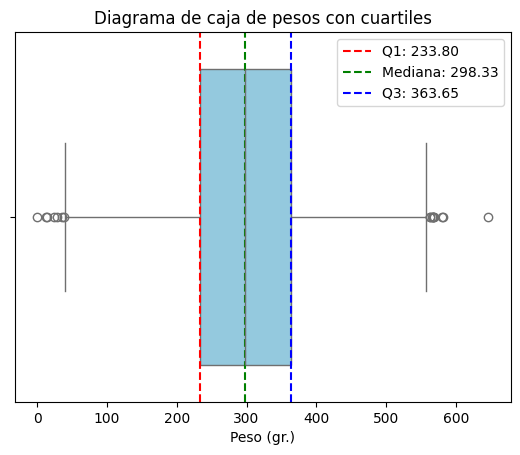

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

costes = df["peso"].dropna()


q1 = costes.quantile(0.25)
q2 = costes.quantile(0.50)
q3 = costes.quantile(0.75)

sns.boxplot(x=costes, orient='h', color='skyblue')

plt.axvline(q1, color='red', linestyle='--', label=f'Q1: {q1:.2f}')
plt.axvline(q2, color='green', linestyle='--', label=f'Mediana: {q2:.2f}')
plt.axvline(q3, color='blue', linestyle='--', label=f'Q3: {q3:.2f}')

plt.title('Diagrama de caja de pesos con cuartiles')
plt.xlabel('Peso (gr.)')
plt.legend()

plt.show()

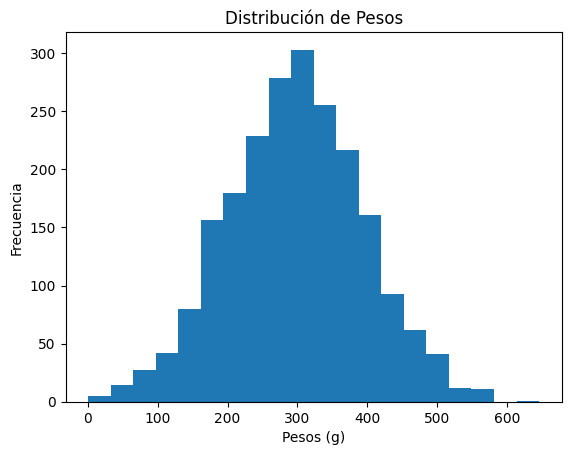

In [ ]:
import matplotlib.pyplot as plt

plt.hist(df["peso"].dropna(), bins=20)
plt.title('Distribución de Pesos')
plt.xlabel('Pesos (g)')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
Q1_pe = df["peso"].quantile(0.25)
Q3_pe = df["peso"].quantile(0.75)
IQR_pe = Q3_pe - Q1_pe
outliers_pe = df[df["peso"] > Q3_pe + 1.5 * IQR_pe]

print("Total outliers:", outliers_pe["peso"].count())
print(Q1_pe)
print(Q3_pe)
print(IQR_pe)

Total outliers: 10
233.79703505994803
363.6469001137108
129.84986505376276


In [ ]:
print(df[['peso', 't_id']].dropna(subset=['peso']).sort_values(by='peso'))

            peso                t_id
744     0.411596   Tamotoes00757.png
1883   12.105956  Tamotoes001794.png
1913   13.610460   Tamotoes00663.png
1319   24.557573   Tamotoes00879.png
1537   27.893041  Tamotoes001512.png
...          ...                 ...
962   567.668339  Tamotoes001830.png
1729  568.989268   Tamotoes00110.png
1937  580.045493  Tamotoes001467.png
792   580.856207   Tamotoes00448.png
360   646.332502   Tamotoes00449.png

[2168 rows x 2 columns]


Teniendo en cuenta que de media  un tomate pesa entre 100 y 300 gramos podemos afirmar que los primeros pesos son erroneos.

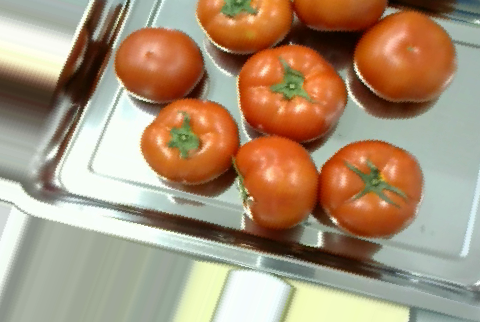

In [ ]:
from IPython.display import Image, display

image_path = '/content/drive/MyDrive/PJ/archive/Tomatoes/Tamotoes00663.png'

try:
    display(Image(filename=image_path))
except FileNotFoundError:
    print(f"Error: No se encontró el archivo en la ruta {image_path}. Por favor, verifica la ruta de tu imagen.")
except Exception as e:
    print(f"Ocurrió un error al cargar la imagen: {e}")

En la imagen podemos ver la imagen Tamotoes00663.png con un peso de 13.610460 gramos. Este peso seria erroneo incluso para una sola unidad pero en este caso tenemos 8 unidades.

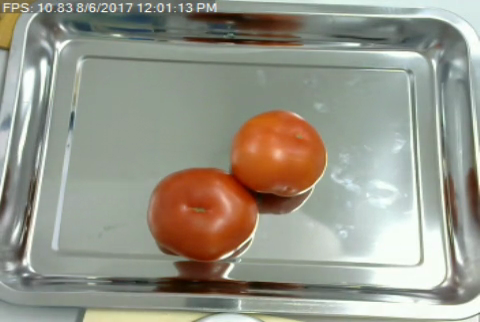

In [ ]:
from IPython.display import Image, display

image_path = '/content/drive/MyDrive/PJ/archive/Tomatoes/Tamotoes001830.png'

try:
    display(Image(filename=image_path))
except FileNotFoundError:
    print(f"Error: No se encontró el archivo en la ruta {image_path}. Por favor, verifica la ruta de tu imagen.")
except Exception as e:
    print(f"Ocurrió un error al cargar la imagen: {e}")

567.668339 gramos y tan solo dos tomates.

Hay imagenes que si que encajarian con el peso adecuado pero bastantes que no.

Dejo los pesos aquí y veremos más adelante. Empiezo con coste inicial.

# **COSTE INICIAL**

In [ ]:
coste_inicial_min = df["coste_inicial"].min()
coste_inicial_max = df["coste_inicial"].max()
negativos_coste = df[df["coste_inicial"] < 0]
nulos_coste = df[df["coste_inicial"].isnull()]

print(f"Coste inicial mínimo: {coste_inicial_min}")
print(f"Coste inicial máximo: {coste_inicial_max}")
print(f"Coste inicial negativos: {len(negativos_coste)}")
print(f"Coste inicial nulos: {len(nulos_coste)}")

Coste inicial mínimo: 0.2985756476027768
Coste inicial máximo: 3.914584693299199
Coste inicial negativos: 0
Coste inicial nulos: 57


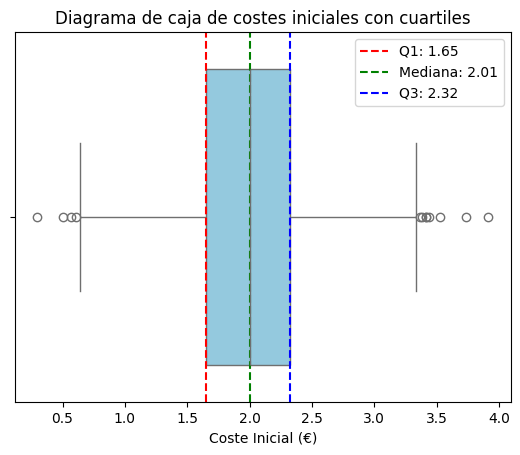

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

costes = df["coste_inicial"].dropna()


q1 = costes.quantile(0.25)
q2 = costes.quantile(0.50)
q3 = costes.quantile(0.75)

sns.boxplot(x=costes, orient='h', color='skyblue')

plt.axvline(q1, color='red', linestyle='--', label=f'Q1: {q1:.2f}')
plt.axvline(q2, color='green', linestyle='--', label=f'Mediana: {q2:.2f}')
plt.axvline(q3, color='blue', linestyle='--', label=f'Q3: {q3:.2f}')

plt.title('Diagrama de caja de costes iniciales con cuartiles')
plt.xlabel('Coste Inicial (€)')
plt.legend()

plt.show()

En el gráfico se ven muchos outliers. Vamos a ver en otro gráfico como visualizamos los datos.

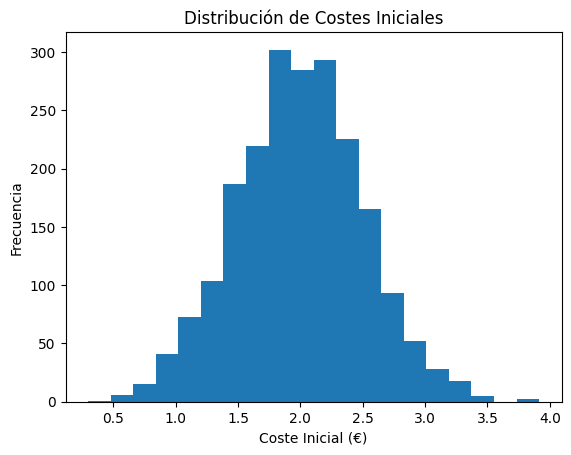

In [ ]:
import matplotlib.pyplot as plt

plt.hist(df["coste_inicial"].dropna(), bins=20)
plt.title('Distribución de Costes Iniciales')
plt.xlabel('Coste Inicial (€)')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
Q1_ci = df["coste_inicial"].quantile(0.25)
Q3_ci = df["coste_inicial"].quantile(0.75)
IQR_ci = Q3_ci - Q1_ci
outliers_ci = df[df["coste_inicial"] > Q3_ci + 1.5 * IQR_ci]

print("Total outliers:", outliers_ci["coste_inicial"].count())
print(Q1_ci)
print(Q3_ci)
print(IQR_ci)

Total outliers: 8
1.6489712742358205
2.3243302729365505
0.67535899870073


Una vez analizados los costes iniciales y viendo que tenemos 8 outliers y el resto de costes se mueven en la media deben de ser excepciones por algún motivo de calidad, tamaño o imperfecciones de la fruta.

Pasamos a analizar los precios de venta:

# **PRECIO VENTA**

In [ ]:
peso_minimo_pv = df["precio_venta"].min()
peso_maximo_pv = df["precio_venta"].max()
negativos_pv = df[df["precio_venta"] < 0]
nulos_pv = df[df["precio_venta"].isnull()]

print(f"Precio venta mínimo: {peso_minimo_pv}")
print(f"Precio venta máximo: {peso_maximo_pv}")
print(f"Total negativos: {len(negativos_pv)}")
print(f"Total nulos: {len(nulos_pv)}")

Precio venta mínimo: 1.2709023727715472
Precio venta máximo: 5.843190650616737
Total negativos: 0
Total nulos: 13


Sabemos que las frutas que no tienen datos de venta es fruta que no ha podido ser vendida porque ha sido dañada durante la distribución. Vamos a comprobar si tienen fecha de venta.

In [ ]:
display(nulos_pv[nulos_pv["fecha_venta"].isnull()])

,cliente,precio_venta,peso,t_id,fecha_venta,hora_venta,tipo,fecha_recogida,hora_recogida,lote,marca,coste_inicial,proveedor


Ninguno de los 13 nulos es un producto dañado y que, por lo tanto, no ha sido vendido. El resto ha sufrido una perdida de información o esta información no ha sido registrada correctamente.

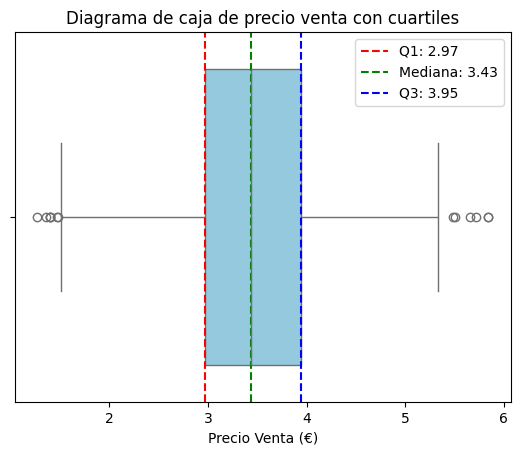

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

costes = df["precio_venta"].dropna()


q1 = costes.quantile(0.25)
q2 = costes.quantile(0.50)
q3 = costes.quantile(0.75)

sns.boxplot(x=costes, orient='h', color='skyblue')

plt.axvline(q1, color='red', linestyle='--', label=f'Q1: {q1:.2f}')
plt.axvline(q2, color='green', linestyle='--', label=f'Mediana: {q2:.2f}')
plt.axvline(q3, color='blue', linestyle='--', label=f'Q3: {q3:.2f}')

plt.title('Diagrama de caja de precio venta con cuartiles')
plt.xlabel('Precio Venta (€)')
plt.legend()

plt.show()

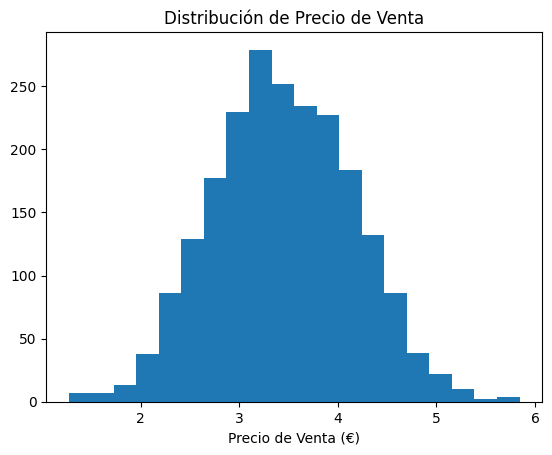

In [ ]:
import matplotlib.pyplot as plt

plt.hist(df["precio_venta"].dropna(), bins=20)
plt.title('Distribución de Precio de Venta')
plt.xlabel('Precio de Venta (€)')
plt.ylabel('')
plt.show()

In [ ]:
Q1_pv = df["precio_venta"].quantile(0.25)
Q3_pv = df["precio_venta"].quantile(0.75)
IQR_pv = Q3_pv - Q1_pv
outliers_pv = df[df["precio_venta"] > Q3_pv + 1.5 * IQR_pv]

print("Total outliers:", outliers_pv["precio_venta"].count())
print(Q1_pv)
print(Q3_pv)



Total outliers: 6
2.970333407249999
3.9460509935841075


En precio venta tenemos 6 outliers mientras que en coste inicial teníamos 8.

In [ ]:
outliers_pv_ci = pd.merge(outliers_ci, outliers_pv, on='t_id', how='inner')
outliers_pv_ci

,cliente_x,precio_venta_x,peso_x,t_id,fecha_venta_x,hora_venta_x,tipo_x,fecha_recogida_x,hora_recogida_x,lote_x,...,peso_y,fecha_venta_y,hora_venta_y,tipo_y,fecha_recogida_y,hora_recogida_y,lote_y,marca_y,coste_inicial_y,proveedor_y
0,MegaAhorro,5.720209,362.441072,Tamotoes00106.png,2022/09/23,14:00,Tomatoes,2022/09/23,10:00,D65S79D79K83L48M48R46V78M,...,362.441072,2022/09/23,14:00,Tomatoes,2022/09/23,10:00,D65S79D79K83L48M48R46V78M,RicoBosque,3.914585,EcoFungicidas Morales


1 coincide.

Vamos a comprobar la norma que tenemos que cumplir que desde día de recogida hasta fecha venta tiene que pasar al menos un día.

In [ ]:
df['fecha_venta'] = pd.to_datetime(df['fecha_venta'], errors='coerce')
df['fecha_recogida'] = pd.to_datetime(df['fecha_recogida'], errors='coerce')

tiempo_diferencia = df['fecha_venta'] - df['fecha_recogida']

al_menos_un_dia = (tiempo_diferencia >= pd.Timedelta(days=1)).all()

print(f"Es verdad que desde fecha_recogida y fecha_venta pasa al menos un día? {al_menos_un_dia}")

Es verdad que desde fecha_recogida y fecha_venta pasa al menos un día? False


In [ ]:
tiempo_diferencia.min()

Timedelta('-26 days +00:00:00')

In [ ]:
tiempo_diferencia.sort_values()

,0
747,-26 days
1483,-23 days
969,-18 days
1339,-18 days
722,-14 days
...,...
791,NaT
1854,NaT
1869,NaT
1902,NaT


Nos encontramos con datos negativos.
Sabemos que no se pueden realizar reservas antes de la recogida por lo que es un error y la norma no se cumple.

**No en todos los productos pasan 24 horas mínimo desde la recogida hasta la venta.**

El peso está en gramos. Vamos a comprobar si a cada proveedor no se le venden más de 100Kg de fruta en un solo día.

In [ ]:
venta_dia = df.groupby(['proveedor', 'fecha_venta'])['peso'].sum()

mayor_100kg = (venta_dia > 100000).any()

print(f"¿Algún proveedor recibe más de 100 kg en un solo día? {mayor_100kg}")

¿Algún proveedor recibe más de 100 kg en un solo día? False


No se le vende más de 100Kg de tomates a un proveedor en un solo día.

**En el caso de los tomates esta norma se cumple.**

Vamos a comprobar que 1 lote solo contiene un tipo de fruta y de una sola marca.

In [ ]:
lote_check = df.groupby('lote').agg({
    'tipo': 'nunique',
    'marca': 'nunique'
}).reset_index()

tipo_check = lote_check[lote_check['tipo'] > 1]
marca_check = lote_check[lote_check['marca'] > 1]

if tipo_check.empty and marca_check.empty:
    print("Cada lote solo contiene un tipo de fruta o una marca.")
else:
    print("Norma incumplida:")
    if not tipo_check.empty:
        print("\nLotes con más de un tipo de fruta:")
        display(tipo_check)
    if not marca_check.empty:
        print("\nLotes con más de una marca:")
        display(marca_check)

Cada lote solo contiene un tipo de fruta o una marca.


En un solo lote con los tomates no encontramos más de un tipo de fruta ni más de una marca.
**Con los tomates esta norma se cumple.**

In [ ]:
df = df.dropna(subset=['coste_inicial', 'precio_venta'])
df = df[df['coste_inicial'] != 0]
df['rentabilidad'] = ((df['precio_venta'] - df['coste_inicial']) / df['coste_inicial']) * 100

df_lote = df.groupby('lote', as_index=False)[['coste_inicial', 'precio_venta', 'rentabilidad']].mean()

corr = df_lote[['coste_inicial', 'precio_venta', 'rentabilidad']].corr()
display(corr)

,coste_inicial,precio_venta,rentabilidad
coste_inicial,1.000000,0.707347,-0.585397
precio_venta,0.707347,1.000000,0.047061
rentabilidad,-0.585397,0.047061,1.000000


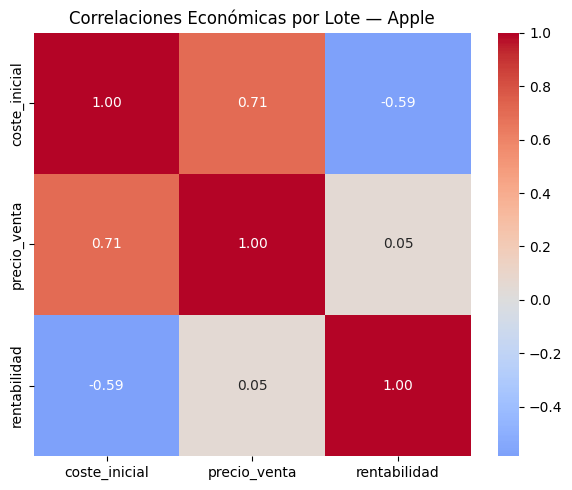

In [ ]:
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title('Correlaciones Económicas por Lote — Apple')
plt.tight_layout()
plt.show()

               precio_venta  coste_inicial      peso
precio_venta       1.000000       0.707347  0.013245
coste_inicial      0.707347       1.000000  0.008401
peso               0.013245       0.008401  1.000000


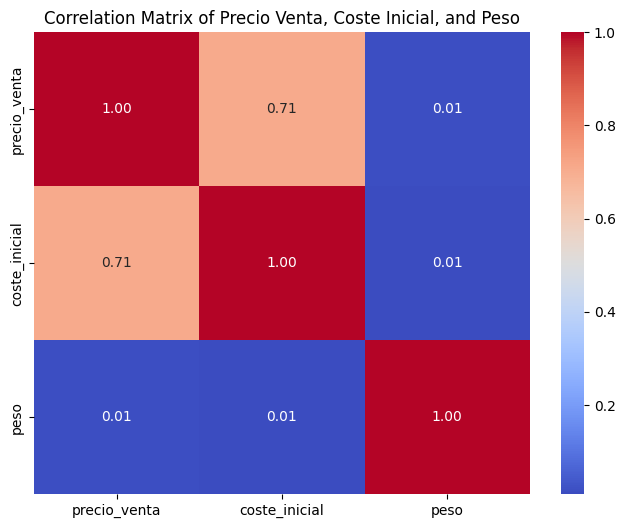

In [ ]:
correlation_matrix = df[['precio_venta', 'coste_inicial', 'peso']].corr()

print(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Precio Venta, Coste Inicial, and Peso')
plt.show()

Las correlaciones entre coste inicial y precio venta son de 0.71 mientras que no encontramos correlación entre precio venta y peso ni entre coste inicial y peso. Creemos que esto debería estar totalmente relacionado ya que a mayor peso deberia tener un coste o precio mayor. Esto refuerza la teoria que exponemos de que los pesos no son correctos.

Aqui dejamos el analisis de los tomates y pasamos a analizar la siguiente fruta.